In [1]:
# グラフ化に必要なものの準備
import matplotlib
import matplotlib.pyplot as plt

# データの扱いに必要なライブラリ
import pandas as pd

plt.style.use('ggplot') 

In [2]:
df = pd.read_csv('analytics.csv') # csv読み込み
df = df.dropna() # N/A値の除外
df['width'] = df.replace('x\d*', {'width_height': ''}, regex=True).width_height.values # width_height列からwidth部分を抜き出してカラムとして追加
df = df.astype({'width': 'int64'}) # 型をint64に変換する
df = df[df['device'].isin(['desktop'])] # deviceがdesktopのもののみにfilterする
df = df.reset_index() # indexを振り直す
df = df.sort_values(by=["width"], ascending=False) # ソートする
df = df.filter(items=['width', 'user']) # widthとuserだけのデータにフィルタする
df.head() # 最初の方のデータだけ表示

,width,user
41,4096,1
27,3840,2
11,3840,10
17,3440,4
26,3200,2


<Figure size 12000x12000 with 0 Axes>

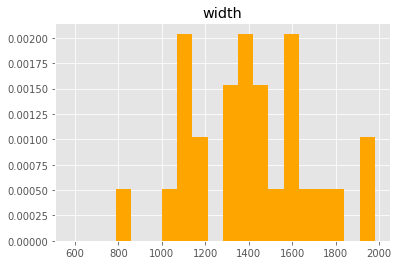

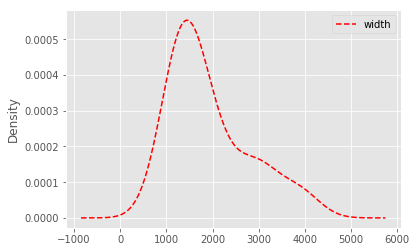

In [11]:
plt.figure()
df.hist(bins=20, column="width", density=True, color='orange', range=(580, 1980))
plt.savefig('./export/hist.png')
df.plot(kind='kde', style='r--', y=df.columns[0], x=df.columns[1])
plt.savefig('./export/plot.png')
plt.show()